# Initial Explorations

- DTI has a big outlier

In [48]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from src.util_functions import get_feature_description

In [3]:
# Read initial csv with data
raw_df = pd.read_csv('datasets/lending_club_loan_two.csv')


In [4]:
# Lets look through columns to see what we are working with.
raw_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
raw_df.shape

(396030, 27)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
raw_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Is there a relationship between DTI and loan charge-offs/fully-paid? (Binary vs Continuous)
- We will perform a comparison after excluding any loans with debt-to-income ratios (DTIs) exceeding 100, as these are generally associated with incomplete applications in the industry and are often flagged by loan officers as obvious candidates for denial. It is common for some entries to have placeholder figures such as 999 or 9999, or any value above 100, as recorded by the loan officer.
- This adjustment will enable a more accurate analysis of the influence on Loan State.

##### Findings
- Within the boxplot and violinplot, we can see medians and middle spread (25-75 quartiles) higher for the charge-off categories as DTI increases.
- The violinplot further shows us how wide the values can range at higher dtis and narrower than it's fully paid counter part which narrows at the top and widens as you go lower.
- Further statistical analysis needs to be done to confirm findings
- After binning DTI into 2 categories to better represent a higher DTI, assumption that DTI raising might be linked to higher charge-offs is debunked. Will still check the statistical significance given the actual DTI's without binning might still hold merit.

In [51]:
raw_df.query("dti > 100")['dti'].nunique()

8

In [63]:
raw_df.loc[raw_df.dti < 100][['loan_status', 'dti']]

,loan_status,dti
0,Fully Paid,26.24
1,Fully Paid,22.05
2,Fully Paid,12.79
3,Fully Paid,2.60
4,Charged Off,33.95
...,...,...
396025,Fully Paid,15.63
396026,Fully Paid,21.45
396027,Fully Paid,17.56
396028,Fully Paid,15.88


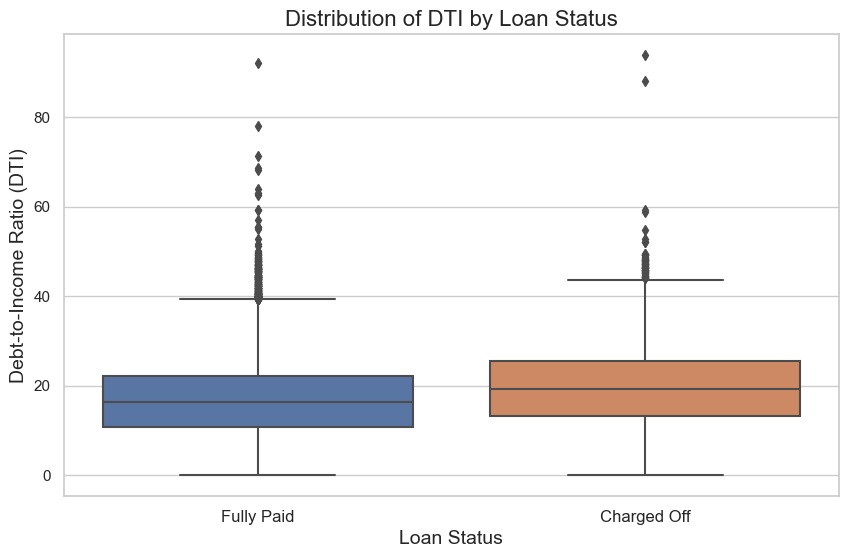

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=raw_df.loc[raw_df['dti'] < 100], x='loan_status', y='dti')

ax.set_title('Distribution of DTI by Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Debt-to-Income Ratio (DTI)', fontsize=14)
ax.set_xticklabels(['Fully Paid', 'Charged Off'], fontsize=12)

plt.show()

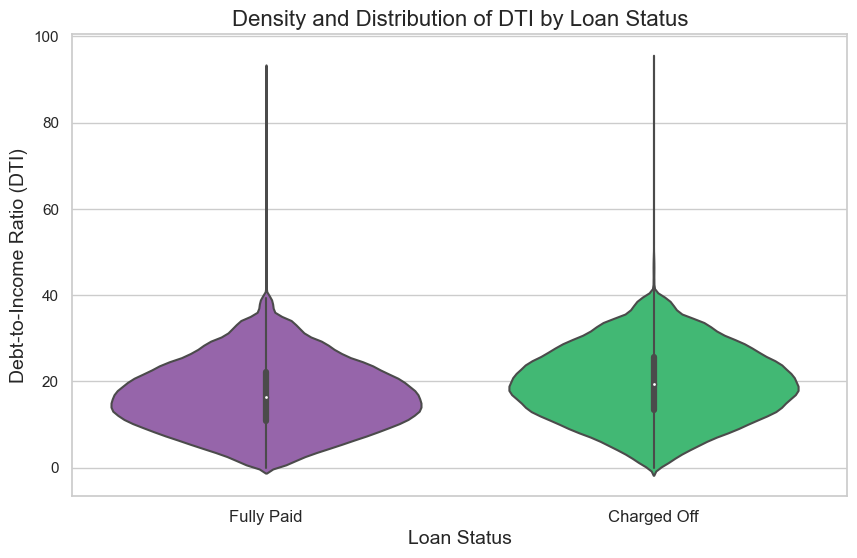

In [62]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.violinplot(data=raw_df.loc[raw_df['dti'] < 100], x='loan_status', y='dti', palette=['#9b59b6', '#2ecc71'])

ax.set_title('Density and Distribution of DTI by Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Debt-to-Income Ratio (DTI)', fontsize=14)
ax.set_xticklabels(['Fully Paid', 'Charged Off'], fontsize=12)

plt.show()

In [95]:
# Perhaps comparing them as categorical might be more relevant given the under-representation of charged-off loans.

bins = [0, 22.65, float('inf')]

labels = ['lower_dti', 'higher_dti']

raw_df['dti_category'] = pd.cut(raw_df['dti'], bins=bins, labels=labels, right=False)

raw_df[['loan_status', 'dti', 'dti_category']]

raw_df.dti_category.value_counts()

dti_category
lower_dti     292369
higher_dti    103661
Name: count, dtype: int64

c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



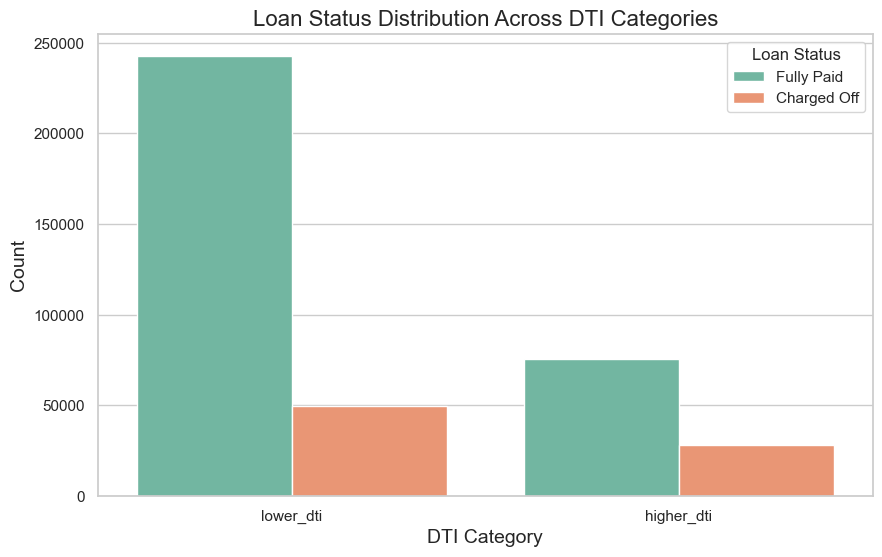

In [94]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=raw_df, x='dti_category', hue='loan_status', palette='Set2')

ax.set_title('Loan Status Distribution Across DTI Categories', fontsize=16)
ax.set_xlabel('DTI Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Loan Status')

plt.show()